Approach

 - Import module
 - Reading an image using OpenCV
 - Detect face
 - Draw a rectangle on the detected face
 - Blur the rectangle
 - Display output
   

In [1]:
#Libraries importation
import numpy as np
import cv2
import matplotlib.pyplot as plt

# SINGLE IMAGE

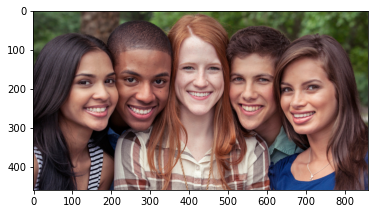

In [11]:
# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread('face_3.png')

# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plotting the original image
plt.imshow(image, cmap="gray")

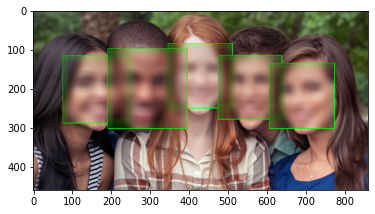

In [12]:
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (25,25),cv2.BORDER_ISOLATED)
    #roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi


# Display the output
plt.imshow(image, cmap="gray")
#plotImages(image)


# VIDEO ~ WEBCAM

In [13]:
cap = cv2.VideoCapture('video_test.mp4')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('outpy2.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while True:
    ret, frame = cap.read()
    face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_data = face_detect.detectMultiScale(frame, 1.3, 4)
    for (x, y, w, h) in face_data:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = frame[y:y+h, x:x+w]
        # applying a gaussian blur over this new rectangle area
        roi = cv2.GaussianBlur(roi, (25,25),cv2.BORDER_ISOLATED)
        # blur image
        frame[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
        out.write(frame)
        cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()